In [1]:
%run supportvectors-common.ipynb



<div style="color:#aaa;font-size:8pt">
<hr/>

 </blockquote>
 <hr/>
</div>



#  Dimensionality Reduction with PCA

Principal Component Analysis (PCA) is by far the most widely used method of dimensionality reduction in data. It has an underlying hypothesis that data, atleast approximately, is proximal to a hyperplane. Oftentimes, this does work out for datasets, so long as the nonlinearities are not too pronounced.

In what follows, we will look at the `wisconsin breast cancer dataset`.

In [2]:
from sklearn.datasets import load_breast_cancer
X,y = load_breast_cancer(return_X_y=True, as_frame=True)
X.describe(include='all').transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [3]:
X.shape

(569, 30)

In [4]:
np.unique(y)

array([0, 1])

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

scaler = StandardScaler()
pca = PCA(n_components=2)
pipeline = Pipeline(steps=[('scaler',scaler), ('pca',pca)])
pca_X = pipeline.fit_transform(X)
pca_X

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])

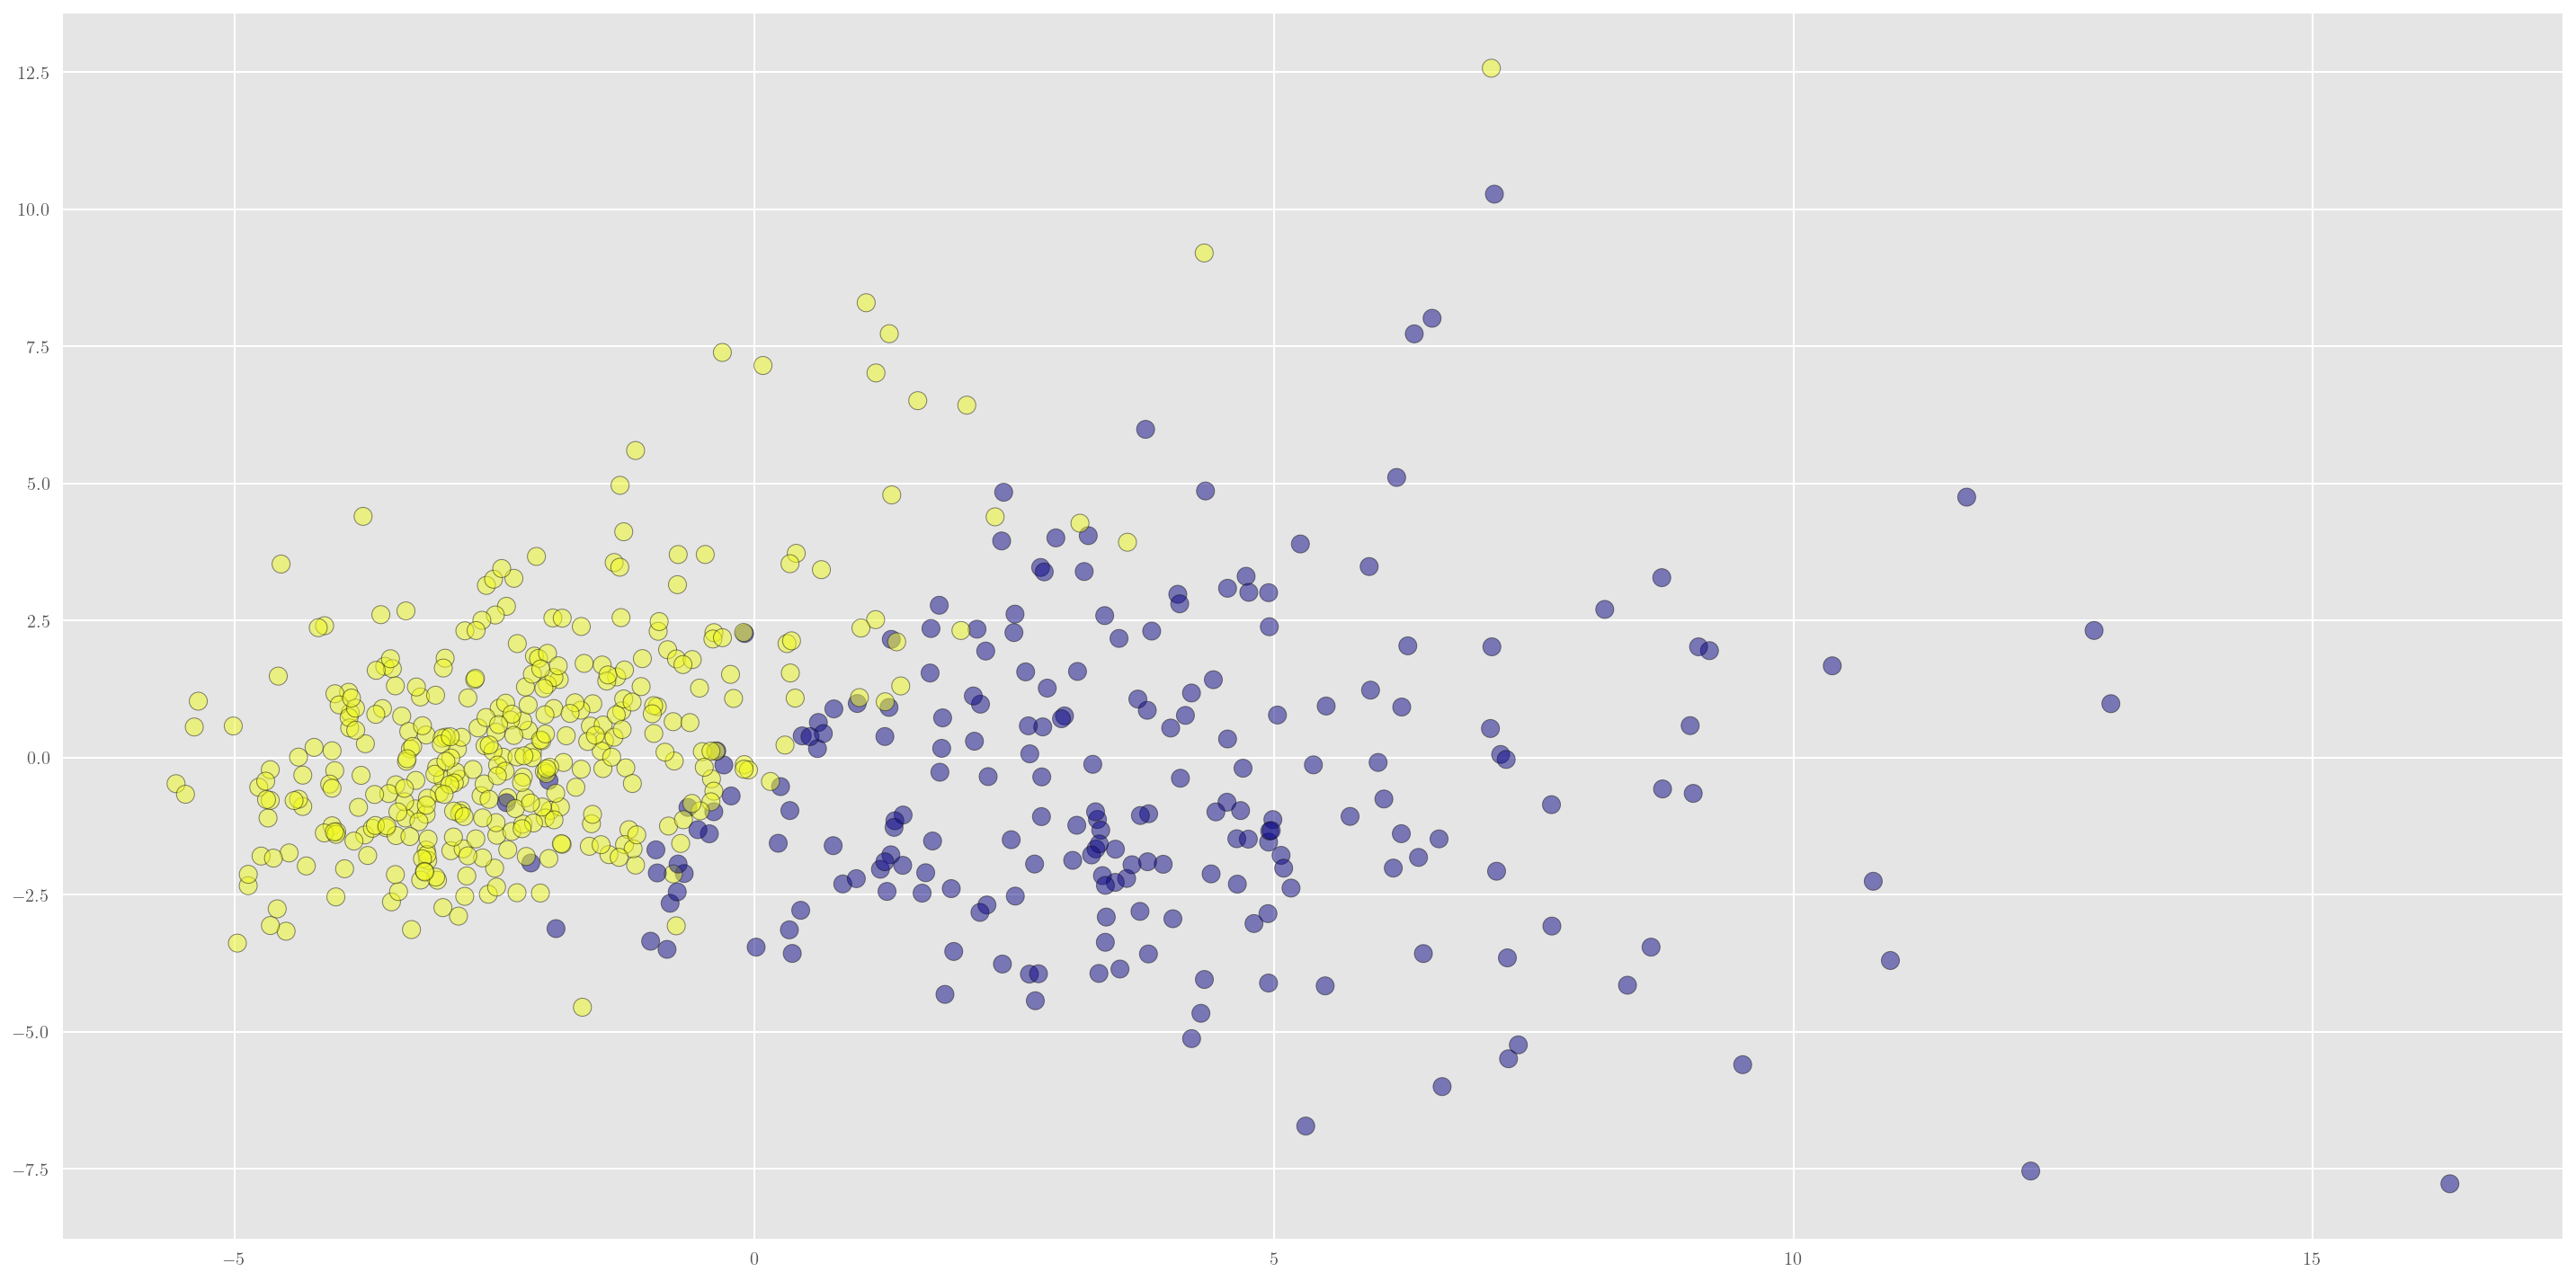

In [7]:
pca_X.shape
#f = pd.DataFrame(data={'x1': pca_X[0], 'x2':pca_X[1], 'y':y})
plt.scatter(x= pca_X[:, 0], y= pca_X[:, 1], c=y, cmap='plasma', s=100, alpha=0.5, edgecolor='k')
plt.tight_layout()

In [8]:
pca = PCA(n_components=30)
pipeline = Pipeline(steps=[('scaler',scaler), ('pca',pca)])
pca_X = pipeline.fit_transform(X)
pca_X
pipeline['pca'].explained_variance_ratio_

array([4.42720256e-01, 1.89711820e-01, 9.39316326e-02, 6.60213492e-02,
       5.49576849e-02, 4.02452204e-02, 2.25073371e-02, 1.58872380e-02,
       1.38964937e-02, 1.16897819e-02, 9.79718988e-03, 8.70537901e-03,
       8.04524987e-03, 5.23365745e-03, 3.13783217e-03, 2.66209337e-03,
       1.97996793e-03, 1.75395945e-03, 1.64925306e-03, 1.03864675e-03,
       9.99096464e-04, 9.14646751e-04, 8.11361259e-04, 6.01833567e-04,
       5.16042379e-04, 2.72587995e-04, 2.30015463e-04, 5.29779290e-05,
       2.49601032e-05, 4.43482743e-06])

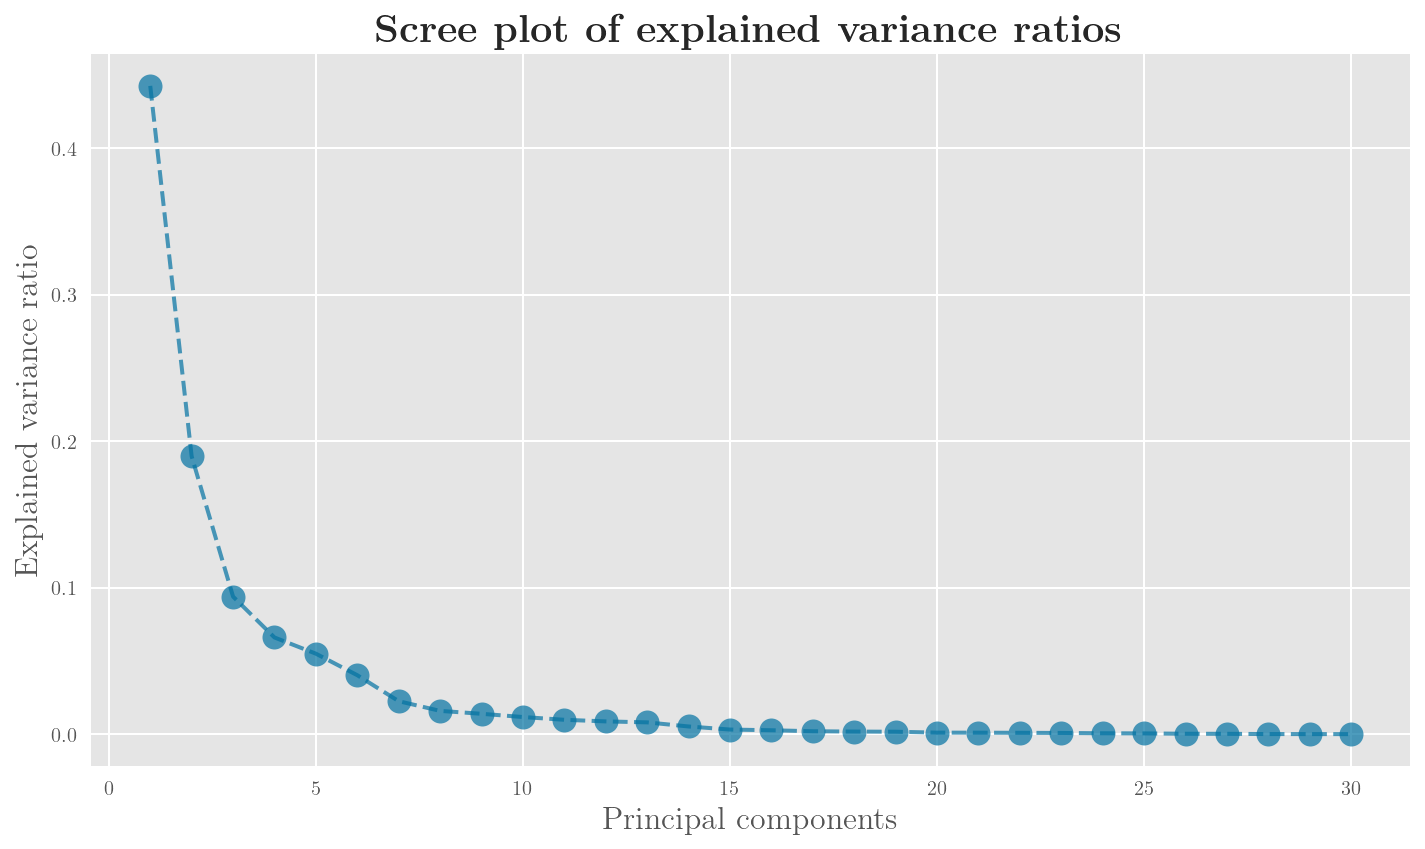

In [9]:
ratios = pipeline['pca'].explained_variance_ratio_
indices = list(range(1, len(ratios)+1))

plt.figure(figsize=(10,6))
plt.plot(indices, ratios, 'bo--', alpha=0.7, linewidth=2, markersize=12)
plt.title(r'\textbf{Scree plot of explained variance ratios}', fontsize=20)
plt.ylabel(r'{Explained variance ratio}', fontsize=16)
plt.xlabel(r'Principal components', fontsize=16)
plt.tight_layout()

# Homework

Finish each of the following:

* Perform a proper exploratory analysis of the data
* Build a full classifier model of the data, and observe the precision, recall and f-1 score
* Build a classifier model with 2 principal components, and observe its precision, recall and f-1 score
* Build a classifier model with 3 principal components, and observe its precision, recall and f-1 score
* Build a classifier model with 6 principal components, and observe its precision, recall and f-1 score

What do you learn these observations?

Would it be reasonable to say that the data is approximately lower dimensional?